In [1]:
import sys
print(sys.version)

import torch

# 当前安装的 PyTorch 库的版本
print(torch.__version__)
# 检查 CUDA 是否可用，即你的系统有 NVIDIA 的 GPU
print(torch.backends.mps.is_available()) #检查mps是否可用

3.11.11 (main, Dec 11 2024, 10:25:04) [Clang 14.0.6 ]
2.5.1
False


In [4]:
"""
PyTorch 循环神经网络（RNN）
循环神经网络（Recurrent Neural Networks, RNN）是一类神经网络架构，专门用于处理序列数据，能够捕捉时间序列或有序数据的动态信息，能够处理序列数据，
如文本、时间序列或音频。
RNN 在自然语言处理（NLP）、语音识别、时间序列预测等任务中有着广泛的应用。
RNN 的关键特性是其能够保持隐状态（hidden state），使得网络能够记住先前时间步的信息，这对于处理序列数据至关重要。

RNN 的基本结构
在传统的前馈神经网络（Feedforward Neural Network）中，数据是从输入层流向输出层的，而在 RNN 中，数据不仅沿着网络层级流动，
还会在每个时间步骤上传播到当前的隐层状态，从而将之前的信息传递到下一个时间步骤。
隐状态（Hidden State）： RNN 通过隐状态来记住序列中的信息。
隐状态是通过上一时间步的隐状态和当前输入共同计算得到的。
公式：

    ht = f(Whh * ht-1 + Wxh * xt + b)

ht：当前时刻的隐状态。
ht-1：前一时刻的隐状态。
Xt：当前时刻的输入。
Whh、Wxh：权重矩阵。
b：偏置项。
f：激活函数（如 Tanh 或 ReLU）。

输出（Output）： RNN 的输出不仅依赖当前的输入，还依赖于隐状态的历史信息。
公式：

    yt = Why * ht + by

yt：当前时刻的隐状态。
Why：当前时刻的隐状态。
"""

'\nPyTorch 循环神经网络（RNN）\n循环神经网络（Recurrent Neural Networks, RNN）是一类神经网络架构，专门用于处理序列数据，能够捕捉时间序列或有序数据的动态信息，能够处理序列数据，如文本、时间序列或音频。\n\nRNN 在自然语言处理（NLP）、语音识别、时间序列预测等任务中有着广泛的应用。\n\nRNN 的关键特性是其能够保持隐状态（hidden state），使得网络能够记住先前时间步的信息，这对于处理序列数据至关重要。\n\nRNN 的基本结构\n在传统的前馈神经网络（Feedforward Neural Network）中，数据是从输入层流向输出层的，而在 RNN 中，数据不仅沿着网络层级流动，还会在每个时间步骤上传播到当前的隐层状态，从而将之前的信息传递到下一个时间步骤。\n\n隐状态（Hidden State）： RNN 通过隐状态来记住序列中的信息。\n\n隐状态是通过上一时间步的隐状态和当前输入共同计算得到的。\n'

In [5]:
"""
PyTorch 中的 RNN 基础
在 PyTorch 中，RNN 可以用于构建复杂的序列模型。
PyTorch 提供了几种 RNN 模块，包括：

torch.nn.RNN：基本的RNN单元。
torch.nn.LSTM：长短期记忆单元，能够学习长期依赖关系。
torch.nn.GRU：门控循环单元，是LSTM的简化版本，但通常更容易训练。
使用 RNN 类时，您需要指定输入的维度、隐藏层的维度以及其他一些超参数。

PyTorch 实现一个简单的 RNN 实例
"""

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

"""
2、定义 RNN 模型
"""
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        # 定义 RNN 层
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        # 定义全连接层
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x: (batch_size, seq_len, input_size)
        out, _ = self.rnn(x)  # out: (batch_size, seq_len, hidden_size)
        # 取序列最后一个时间步的输出作为模型的输出
        out = out[:, -1, :]  # (batch_size, hidden_size)
        out = self.fc(out)  # 全连接层
        return out

In [12]:
"""
3、创建训练数据

为了训练 RNN，我们生成一些随机的序列数据。这里的目标是将每个序列的最后一个值作为分类的目标。
"""

# 生成一些随机序列数据
num_samples = 1000
seq_len = 10
input_size = 5
output_size = 2  # 假设二分类问题

# 随机生成输入数据 (batch_size, seq_len, input_size)
X = torch.randn(num_samples, seq_len, input_size)
# 随机生成目标标签 (batch_size, output_size)
Y = torch.randint(0, output_size, (num_samples,))

# 创建数据加载器
dataset = TensorDataset(X, Y)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

tensor([[[ 0.0681, -1.7982,  0.5032,  0.2664, -0.0489],
         [-0.6095, -0.1538,  0.7733,  0.1364, -0.5710],
         [ 0.6883,  0.8575,  0.3311,  0.6153, -1.1575],
         ...,
         [ 0.8028,  1.1842,  1.0690, -0.5545, -1.3974],
         [-0.8901,  0.2771, -0.0588,  0.5126, -1.1227],
         [-1.2916,  0.3911, -0.8839,  0.4352, -0.0459]],

        [[-0.8285, -0.1530,  0.7030, -0.2461,  0.0797],
         [ 0.1238,  0.0732, -0.4472, -1.0980,  1.5869],
         [-0.8887,  0.9152, -0.0489,  1.7983, -0.6685],
         ...,
         [ 0.2044,  1.8334,  1.2644, -0.2150, -0.2868],
         [ 0.4447, -0.2249,  0.4971,  0.4247,  2.4364],
         [ 0.2016, -0.4633,  1.6150,  0.2503,  0.2427]],

        [[-0.0219, -2.1993,  0.9035, -0.8583,  1.6870],
         [-0.0101, -0.6151,  0.5427,  0.3299, -0.2452],
         [ 0.3271, -1.1988, -1.6833,  0.4210, -0.6462],
         ...,
         [ 0.2373,  0.7648, -1.4547, -0.6917,  0.4112],
         [ 1.4682,  3.2145,  1.2190, -0.7019,  0.7957],
  

In [8]:
"""
4、定义损失函数与优化器
"""

# 模型实例化
model = SimpleRNN(input_size=input_size, hidden_size=64, output_size=output_size)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()  # 多分类交叉熵损失
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [9]:
"""
5、训练模型
"""

num_epochs = 10

for epoch in range(num_epochs):
    model.train()  # 设置模型为训练模式
    total_loss = 0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        # 前向传播
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # 计算准确率
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}, Accuracy: {accuracy:.2f}%")

Epoch [1/10], Loss: 0.6953, Accuracy: 53.30%
Epoch [2/10], Loss: 0.6912, Accuracy: 52.60%
Epoch [3/10], Loss: 0.6880, Accuracy: 55.10%
Epoch [4/10], Loss: 0.6845, Accuracy: 55.30%
Epoch [5/10], Loss: 0.6836, Accuracy: 57.10%
Epoch [6/10], Loss: 0.6840, Accuracy: 55.50%
Epoch [7/10], Loss: 0.6841, Accuracy: 56.10%
Epoch [8/10], Loss: 0.6808, Accuracy: 55.70%
Epoch [9/10], Loss: 0.6791, Accuracy: 56.60%
Epoch [10/10], Loss: 0.6809, Accuracy: 55.30%


In [10]:
"""
6、测试模型

训练结束后，我们可以在测试集上评估模型的表现。
"""

# 测试模型
model.eval()  # 设置模型为评估模式
with torch.no_grad():
    total = 0
    correct = 0
    for inputs, labels in train_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 58.10%


Epoch [20/200], Loss: 0.0005
Epoch [40/200], Loss: 0.0001
Epoch [60/200], Loss: 0.0001
Epoch [80/200], Loss: 0.0000
Epoch [100/200], Loss: 0.0000
Epoch [120/200], Loss: 0.0000
Epoch [140/200], Loss: 0.0000
Epoch [160/200], Loss: 0.0000
Epoch [180/200], Loss: 0.0000
Epoch [200/200], Loss: 0.0000
Input sequence:  hello
Predicted sequence:  elloh


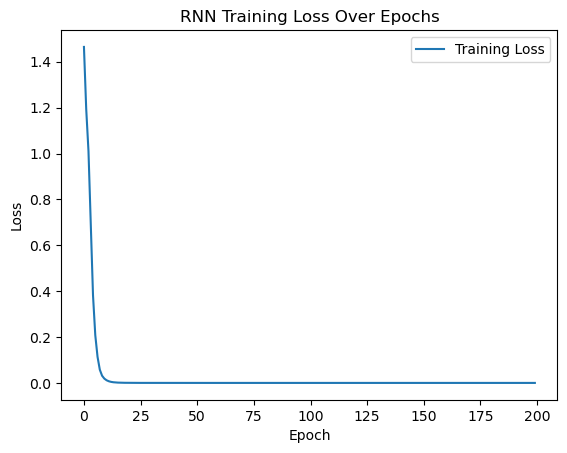

In [11]:
"""
8、可视化代码：
"""

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# 数据集：字符序列预测（Hello -> Elloh）
char_set = list("hello")
char_to_idx = {c: i for i, c in enumerate(char_set)}
idx_to_char = {i: c for i, c in enumerate(char_set)}

# 数据准备
input_str = "hello"
target_str = "elloh"
input_data = [char_to_idx[c] for c in input_str]
target_data = [char_to_idx[c] for c in target_str]

# 转换为独热编码
input_one_hot = np.eye(len(char_set))[input_data]

# 转换为 PyTorch Tensor
inputs = torch.tensor(input_one_hot, dtype=torch.float32)
targets = torch.tensor(target_data, dtype=torch.long)

# 模型超参数
input_size = len(char_set)
hidden_size = 8
output_size = len(char_set)
num_epochs = 200
learning_rate = 0.1

# 定义 RNN 模型
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden):
        out, hidden = self.rnn(x, hidden)
        out = self.fc(out)  # 应用全连接层
        return out, hidden

model = RNNModel(input_size, hidden_size, output_size)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 训练 RNN
losses = []
hidden = None  # 初始隐藏状态为 None
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # 前向传播
    outputs, hidden = model(inputs.unsqueeze(0), hidden)
    hidden = hidden.detach()  # 防止梯度爆炸

    # 计算损失
    loss = criterion(outputs.view(-1, output_size), targets)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

# 测试 RNN
with torch.no_grad():
    test_hidden = None
    test_output, _ = model(inputs.unsqueeze(0), test_hidden)
    predicted = torch.argmax(test_output, dim=2).squeeze().numpy()

    print("Input sequence: ", ''.join([idx_to_char[i] for i in input_data]))
    print("Predicted sequence: ", ''.join([idx_to_char[i] for i in predicted]))

# 可视化损失
plt.plot(losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("RNN Training Loss Over Epochs")
plt.legend()
plt.show()

In [39]:
"""
在这个批处理例子中，input_tensor 的形状是 [3, 10]，表示一个包含 3 个数据点的批处理，每个数据点有 10 个特征。
通过 linear_layer 后，output_tensor 的形状变为 [3, 5]，表示每个数据点现在有 5 个特征。

nn.Linear 的操作可以表示为 output = input @ weight + bias，其中 @ 表示矩阵乘法，weight 和 bias 是线性层的可学习参数。
在初始化时，这些参数是随机初始化的，并在训练过程中通过梯度下降进行优化。
"""

import torch
import torch.nn as nn

# 假设输入和输出的特征大小
input_size = 10
output_size = 5
batch_size = 3

# 创建一个线性层实例
linear_layer = nn.Linear(input_size, output_size)

# 假设我们有一个具有10个特征的单个数据点
# 形状为 [input_size]
input_tensor = torch.randn(batch_size, input_size)
print(input_tensor)

# 通过线性层传递输入
output_tensor = linear_layer(input_tensor)
print(output_tensor)

# 打印输入和输出的形状
print("Input shape:", input_tensor.shape)  # 应该是 [input_size]
print("Output shape:", output_tensor.shape)  # 应该是 [output_size]


tensor([[-0.9219, -0.7474,  1.7006,  0.9166,  0.5229, -0.6804,  0.3549, -1.6398,
          1.4895, -0.0379],
        [ 0.0243, -1.0771,  1.3482, -0.1600, -1.9958, -0.6041,  0.6826, -2.0703,
          1.2345,  0.4546],
        [-0.9819,  0.2940, -1.0224,  1.6251, -0.0781, -0.8563, -0.9143,  0.3934,
          0.2157,  0.5122]])
tensor([[-0.0036, -0.2998, -0.4291,  0.6587, -0.3219],
        [-1.1172, -0.5292, -0.3346,  1.2767,  0.7344],
        [ 1.0964, -0.1642, -0.1407, -0.8762, -0.4032]],
       grad_fn=<AddmmBackward0>)
Input shape: torch.Size([3, 10])
Output shape: torch.Size([3, 5])


In [41]:
"""
rnn 模型详细说明

在RNN模型中，隐藏状态hidden是网络中传递信息的关键元素。在每次迭代时，hidden包含了前一个时间步的信息，并且会与当前的输入x一起被送入RNN单元，
以产生新的隐藏状态和输出。具体计算过程通常如下：
1.前一个时间步的隐藏状态hidden通过一个线性变换（与权重矩阵相乘）。
2.当前时间步的输入x也通过一个线性变换。
3.这两个变换的结果通常会被相加，并通过一个非线性激活函数（如tanh或ReLU）来生成新的隐藏状态。

https://note.youdao.com/web/#/file/WEB3647e790590e68e0ef215d8d0ed6baa3/note/WEB4ec87891591ac750eb9cdb68b09492dd/
"""
import torch
import torch.nn as nn

# 假设的参数
input_size = 10
hidden_size = 8
batch_size = 5
seq_len = 3

# 创建一个RNN实例
rnn = nn.RNN(input_size, hidden_size, batch_first=True)

# 假设的输入x，形状为[batch_size, seq_len, input_size]
x = torch.randn(batch_size, seq_len, input_size)

# hidden是None，表示没有之前的隐藏状态
hidden = None

# 调用RNN
out, hidden = rnn(x, hidden)

# 打印输出和隐藏状态的形状
print("Output shape:", out.shape)  # 应该是 [batch_size, seq_len, hidden_size]
print("Hidden shape:", hidden.shape)  # 应该是 [1, batch_size, hidden_size]


Output shape: torch.Size([5, 3, 8])
Hidden shape: torch.Size([1, 5, 8])


In [56]:
"""
在PyTorch中，nn.CrossEntropyLoss 用于计算多分类问题的交叉熵损失。该损失函数通常期望的输入 predicted 的形状是 [batch_size, num_classes]，而 target 的形状是 [batch_size]，其中每个元素是类别的索引（从 0 开始）。

在你提供的例子中，predicted 的形状是 [5, 5]，这表示有 5 个样本，每个样本有 5 个预测值（对应于 5 个类别）。target 的形状是 [5]，这表示每个样本的目标类别索引。

nn.CrossEntropyLoss 的工作方式如下：

它首先对 predicted 应用一个 log-softmax 函数，这样每个样本的预测值就被转换成了一个概率分布的对数。
然后，它使用 target 中的类别索引来从每个样本的概率分布中选择对应的概率值（即对数概率）。
最后，它计算所有样本的负对数概率的平均值，这就是最终的损失值。
具体到你的例子：

predicted 的每一行被视为一个样本的预测对数概率分布。
target 中的每个元素对应于 predicted 中相应行的正确类别索引。
nn.CrossEntropyLoss 会计算每个样本的负对数概率，然后取所有样本的平均值作为损失。
下面是如何在代码中使用 nn.CrossEntropyLoss：
"""
import torch
import torch.nn as nn

# 假设的预测值，形状为 [5, 5]
predicted = torch.randn(5, 5)
print(predicted)
# 真实目标值，形状为 [5]
target = torch.tensor([0, 1, 2, 3, 4])

# 创建 CrossEntropyLoss 实例
criterion = nn.CrossEntropyLoss()

# 计算损失
loss = criterion(predicted, target)

print(loss)


tensor([[ 0.8721,  0.6459,  0.6299,  0.3036, -0.3167],
        [ 0.7035,  0.1761, -0.2195,  0.8886,  1.3656],
        [ 0.0404, -0.3586,  0.9566,  1.0057,  0.3416],
        [ 0.4893,  0.9244, -1.9603,  0.4647, -0.5524],
        [-1.6283, -1.1964, -0.9867,  0.2436, -0.9930]])
tensor(1.5801)


In [5]:
"""
转换为独热编码

np.eye(len)会创建一个单位矩阵（identity matrix），其大小为 len x len。 单位矩阵是一个方阵，其对角线上的元素都是1，其余位置的元素都是0。
"""
import numpy as np

char_set = list("hello")
char_to_idx = {c: i for i, c in enumerate(char_set)}

input_str = "hello"
input_data = [char_to_idx[c] for c in input_str]
print(input_data)

input_one_hot = np.eye(len(char_set))[input_data]
print(input_one_hot)

"""
在这个例子中，input_data是一个包含5个元素的数组[0, 1, 3, 3, 4]，所以结果input_one_hot是从单位矩阵中选择的第0行,第1行,第3行,第3行和第4行（因为索引是从0开始的）。

通常，这种操作用于将类别标签（例如，一个包含整数的数组）转换成独热编码（one-hot encoding）。独热编码是一种将类别标签转换成二进制（0和1）向量的方法，
其中每个类别对应一个唯一的二进制向量。在上面的例子中，如果input_data是类别标签，那么input_one_hot将是一个独热编码矩阵。
"""

[0, 1, 3, 3, 4]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


'\n在这个例子中，input_data是一个包含5个元素的数组[0, 1, 3, 3, 4]，所以结果input_one_hot是从单位矩阵中选择的第0行,第1行,第3行,第3行和第4行（因为索引是从0开始的）。\n\n通常，这种操作用于将类别标签（例如，一个包含整数的数组）转换成独热编码（one-hot encoding）。独热编码是一种将类别标签转换成二进制（0和1）向量的方法，\n其中每个类别对应一个唯一的二进制向量。在上面的例子中，如果input_data是类别标签，那么input_one_hot将是一个独热编码矩阵。\n'